**Task 1**

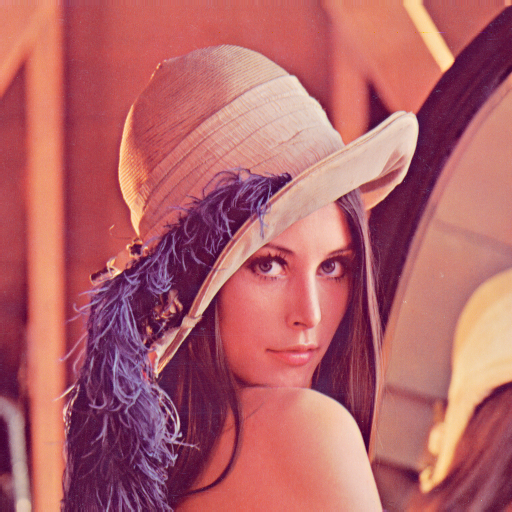

In [6]:
from PIL import Image
import numpy as np

# Load the RGB image
image = Image.open("lena.png")

# Convert to a NumPy array for manipulation
image_array = np.array(image)

# Apply the grayscale formula
grayscale_image = ((0.3 * image_array[:, :, 0]) + (0.59 * image_array[:, :, 1]) + (0.11 * image_array[:, :, 2]))

# Convert the resulting NumPy array back to an image
grayscale_image = Image.fromarray(grayscale_image.astype(np.uint8))

# Save the grayscale image
grayscale_image.save("lena_grayscale.jpg")

image







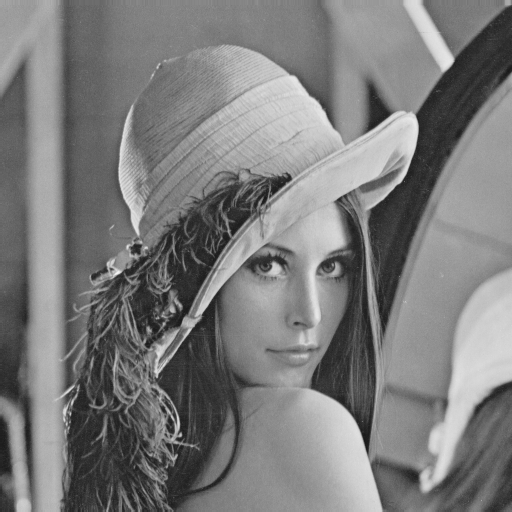

In [7]:
grayscale_image

**Task 2**

In [8]:
import json
import numpy as np

# Convert the grayscale image to a NumPy array
grayscale_data = np.array(grayscale_image)

# Create a dictionary to store the data
data = {
    "image_width": grayscale_image.width,
    "image_height": grayscale_image.height,
    "grayscale_image_data": grayscale_data.tolist()  # Convert the NumPy array to a list
}

# Save the data to a JSON file
with open("einstein_grayscale.json", "w") as json_file:
    json.dump(data, json_file)

**Task 3**

Old Image


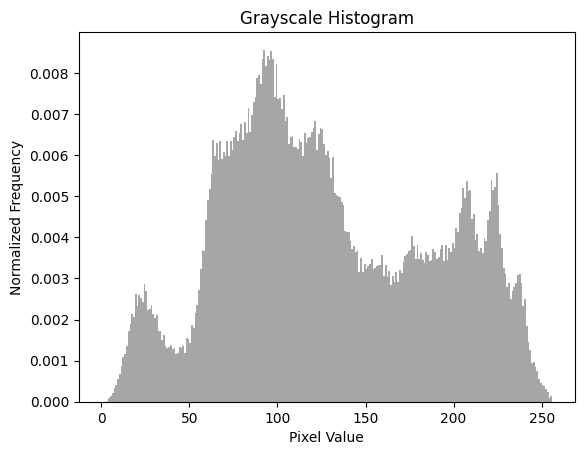

New Image


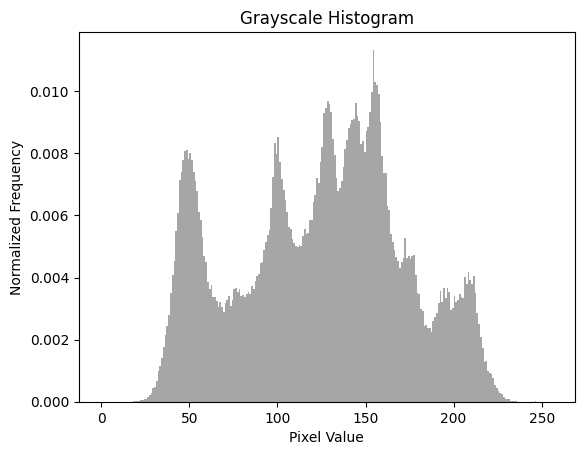

In [23]:
import matplotlib.pyplot as plt

# Define a function to create a histogram from the grayscale image
def make_histogram(image):
    # Flatten the 2D grayscale image into a 1D array
    flattened_image = np.ravel(image)

    # Create a histogram
    histogram, bins, _ = plt.hist(flattened_image, bins=256, range=(0, 256), density=True, color='gray', alpha=0.7)

    # Customize the plot
    plt.title("Grayscale Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Normalized Frequency")

    # Show the histogram plot
    plt.show()

# Call the function to create and plot the histogram
print("Old Image")
make_histogram(image)
print("New Image")
make_histogram(grayscale_image)

 **Task 4**

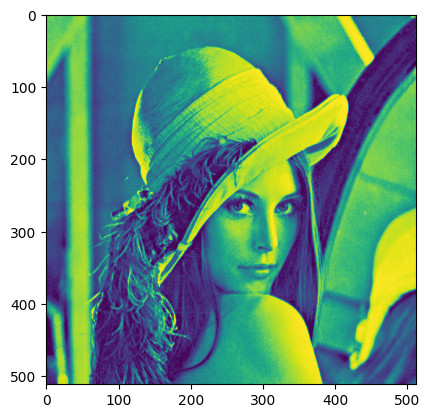

In [24]:
import numpy as np

# Function to calculate the cumulative sum of a histogram
def cumulative_sum(hist):
    cum_sum = np.cumsum(hist)
    return cum_sum

# Load the grayscale image (assuming you already have it)
grayscale_image = Image.open("lena_grayscale.jpg")

# Create a histogram using the make_histogram function from Task 3
hist, _ = np.histogram(np.array(grayscale_image).ravel(), bins=256, range=(0, 256), density=True)

# Calculate the cumulative sum of the histogram
cumulative_histogram = cumulative_sum(hist)

# Calculate min and max values for normalization
min_val = np.min(cumulative_histogram)
max_val = np.max(cumulative_histogram)

# Calculate the equalized histogram using the formula
equalized_histogram = ((cumulative_histogram - min_val) * 255) / (max_val - min_val)

# Round the values to integers
equalized_histogram = np.round(equalized_histogram).astype(int)

# Apply histogram equalization to the grayscale image
equalized_image = equalized_histogram[grayscale_image]

# Convert the NumPy array back to an image
equalized_image = Image.fromarray(equalized_image.astype(np.uint8))

# Save the equalized image
equalized_image.save("lena_equalized.jpg")
plt.show('equalized_histogram')
plt.imshow(equalized_image)

**Task 5**

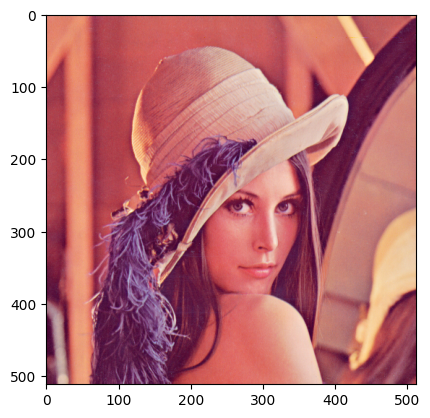

In [19]:
from PIL import Image, ImageFilter
import numpy as np

# Load the Lena image
lena_image = Image.open("lena.png")

# Resize the image to 16x16
resized_lena = lena_image.resize((16, 16))

# Define the 3x3 kernel as a NumPy array
kernel = np.array([
    [3, 0, 3],
    [1, 0, 1],
    [3, 0, 3]
], dtype=np.float32)

# Apply the convolution operation with the kernel using the filter function
filtered_lena = resized_lena.filter(ImageFilter.Kernel((3, 3), kernel.flatten(), scale=1))

# Save the filtered image
filtered_lena.save("lena_filtered.png")
plt.imshow(lena_image)



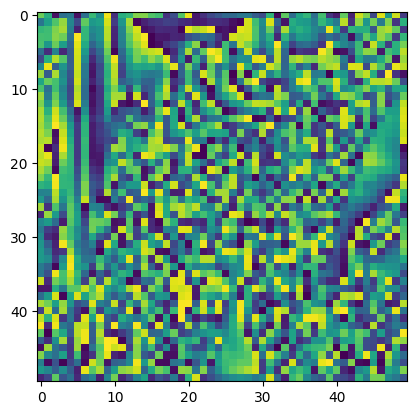

In [17]:
plt.imshow(filtered_lena)

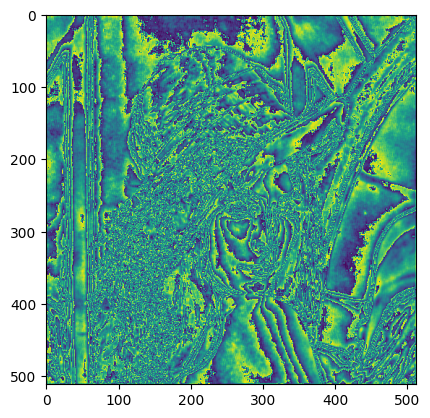

In [13]:
import numpy as np
from PIL import Image

def convolve(image, kernel):
    # Get the dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate the padding required for the convolution operation
    pad_height = (kernel_height - 1) // 2
    pad_width = (kernel_width - 1) // 2

    # Create a padded version of the image
    padded_image = np.zeros((image_height + 2 * pad_height, image_width + 2 * pad_width))
    padded_image[pad_height:-pad_height, pad_width:-pad_width] = image

    # Create an output array to store the result of the convolution operation
    output = np.zeros_like(image)

    # Perform the convolution operation
    for i in range(image_height):
        for j in range(image_width):
            output[i, j] = np.sum(kernel * padded_image[i:i + kernel_height, j:j + kernel_width])

    return output

# Resize the image to 512x512 pixels
resized_image = image.resize((512, 512))

# Convert the resized image to a grayscale numpy array
image_array = np.array(resized_image.convert('L'))

# Define the 3x3 kernel as a NumPy array
kernel = np.array([
    [3, 0, 3],
    [1, 0, 1],
    [3, 0, 3]
], dtype=np.float32)

# Apply the convolution operation with the kernel using convolve()
filtered_image = convolve(image_array, kernel)

# Convert the filtered image back to a PIL Image object
filtered_pil_image = Image.fromarray(filtered_image.astype(np.uint8))

filtered_pil_image.save("lena_filtered.png")

img = plt.imread("lena_filtered.png")
plt.imshow(img)
plt.show()


In [14]:
from scipy.signal import convolve2d

lena_image = Image.open("lena_grayscale.jpg")

# Resizing the image
resized_lena = lena_image.resize((50, 50))

# 3x3 kernel as a NumPy array
kernel = np.array([
    [3, 0, 3],
    [1, 0, 1],
    [3, 0, 3]
], dtype=np.float32)

# Convert the image to a NumPy array
image_array = np.array(resized_lena)

# Apply convolution using scipy.signal.convolve2d library
filtered_array = convolve2d(image_array, kernel, mode='same', boundary='wrap')

# Create a PIL image from the filtered array
filtered_lena = Image.fromarray(filtered_array.astype(np.uint8))

# Save the filtered image
filtered_lena.save("lena_filtered.png")

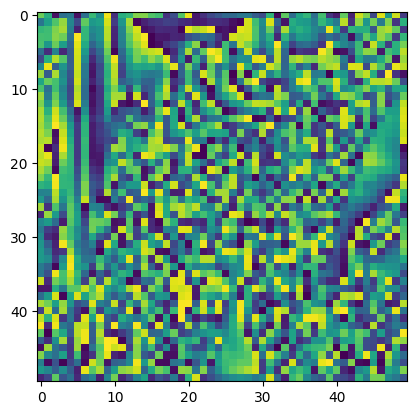

In [16]:
plt.imshow(filtered_lena)

i cant understand which filter is correct so i used all 3
